In [43]:
import requests
import os
import numpy as np
import pandas as pd

%matplotlib inline

In [44]:
stock_df = pd.read_csv("Resources/stock_historical_prices.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)['Close']
stock_df = stock_df.sort_index()
stock_df.tail()

Date
2021-03-12    0.024
2021-03-15    0.023
2021-03-16    0.021
2021-03-17    0.021
2021-03-18    0.021
Name: Close, dtype: float64

In [45]:
returns = stock_df.pct_change()
returns.dropna(inplace=True)
returns.head()

Date
2020-01-03    0.250000
2020-01-06    0.200000
2020-01-07    0.166667
2020-01-08    0.000000
2020-01-09    0.000000
Name: Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

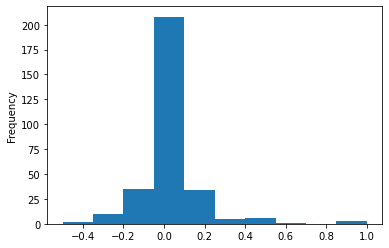

In [46]:
returns.plot(kind="hist")

In [47]:
mean = returns.mean()
std = returns.std()
(mean, std)

(0.018400556593291678, 0.17261211583474748)

In [48]:
from random import gauss
gauss(mean, std)

0.31648440706047587

In [49]:
last_val = stock_df.iloc[-1]
last_val

0.020999999716877937

In [50]:
last_val * (1+gauss(mean,std))

0.01845759153110152

In [51]:
simvals = [last_val]
days = 15
for day in range(days):
    newval = simvals[:]

In [52]:
def simulate_stocks(days,starting_val):
    simvals = [starting_val]
    
    for day in range(days):
        newval = simvals[-1] * (1+gauss(mean,std))
        simvals.append(newval)
        

    return simvals

In [53]:
simulate_stocks(30,last_val)

[0.020999999716877937,
 0.022645605574772347,
 0.02464060725917759,
 0.02386358003543725,
 0.02484333896505243,
 0.02004933417224799,
 0.015750418585336358,
 0.014365737136277663,
 0.012183545145375669,
 0.008986661721254062,
 0.010830378626808064,
 0.01124455026157255,
 0.011713000261294838,
 0.016400704230024134,
 0.019107567706150606,
 0.01668228780739819,
 0.01588375764642527,
 0.018663826258719325,
 0.018917533003443326,
 0.019964854006693997,
 0.020181741032274953,
 0.021092181969302046,
 0.01985865781638586,
 0.017087081541672166,
 0.012297301035755152,
 0.014695768393999113,
 0.019214889194780278,
 0.016678792362307324,
 0.014135571016375009,
 0.013220860460895554,
 0.012870741210950339]

In [54]:
trials =1000
results = []
for trial in range(trials):
    results.append(simulate_stocks(15,last_val))

In [55]:
pd.DataFrame(results).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.021,0.021030,0.019735,0.019558,0.028233,0.027779,0.031767,0.027744,0.024844,0.020692,0.016752,0.015559,0.017455,0.020721,0.021780,0.024997
1,0.021,0.013990,0.014576,0.016128,0.013898,0.014110,0.015394,0.018303,0.019217,0.023974,0.026210,0.030381,0.034124,0.040986,0.053509,0.061037
2,0.021,0.024267,0.025114,0.021453,0.018825,0.016858,0.018059,0.018409,0.013178,0.016113,0.017791,0.018187,0.012787,0.011980,0.017027,0.016741
3,0.021,0.023288,0.021601,0.021159,0.015863,0.021495,0.017982,0.016639,0.021986,0.019629,0.026338,0.027682,0.026581,0.024424,0.024975,0.020959
4,0.021,0.019812,0.018065,0.016019,0.019845,0.020168,0.022715,0.024551,0.021972,0.017711,0.014553,0.015696,0.017702,0.023271,0.019734,0.024457


In [56]:
results_df = pd.DataFrame(results).T
results_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,...,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000,0.021000
1,0.021030,0.013990,0.024267,0.023288,0.019812,0.027884,0.021036,0.011142,0.019959,0.016208,...,0.018543,0.023677,0.023654,0.024084,0.021199,0.019459,0.019138,0.020476,0.016330,0.021525
2,0.019735,0.014576,0.025114,0.021601,0.018065,0.025066,0.021969,0.010315,0.025579,0.018899,...,0.023290,0.015677,0.021360,0.025644,0.020437,0.017549,0.016534,0.016565,0.017698,0.025031
3,0.019558,0.016128,0.021453,0.021159,0.016019,0.028671,0.019654,0.011948,0.021576,0.020127,...,0.034388,0.012904,0.023318,0.023626,0.017563,0.019369,0.014981,0.010416,0.022839,0.021413
4,0.028233,0.013898,0.018825,0.015863,0.019845,0.043448,0.018706,0.010427,0.022521,0.024741,...,0.032162,0.013381,0.019494,0.022277,0.014091,0.021979,0.012908,0.008881,0.018158,0.021182


<AxesSubplot:>

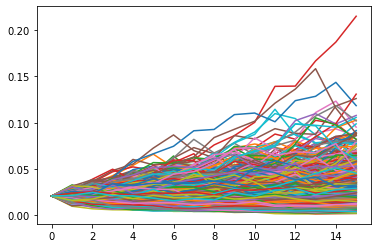

In [62]:
results_df.plot(legend=False)

In [63]:
end_values = results_df.iloc[-1]
end_values.head()

0    0.024997
1    0.061037
2    0.016741
3    0.020959
4    0.024457
Name: 15, dtype: float64

<AxesSubplot:ylabel='Frequency'>

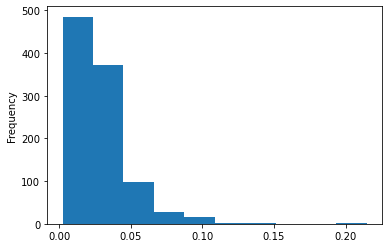

In [64]:
end_values.plot(kind="hist")

In [65]:
end_values.quantile([0.1,0.9])

0.1    0.009185
0.9    0.051472
Name: 15, dtype: float64

In [61]:
last_val

0.020999999716877937